In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('adults.csv')

data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


As seen in the above table and having a general overview, we can see that `capital.gain` attribute has great investments put in. It reaches maximum of 99999, but it is considered as a market cap.
Having a general look on `hours.per.week`, we can see that minimum number and maximum someone had worked are 1 and 99 respectively. This seems to be an outlier as no one can work this low and gain something or have enough time to work that much as well. And same goes with the `age` attribute. We'll take care of these details while preparing our dataset. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data[data == '>50K. '].count()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### 1.1 Data Preparation

The two class variables that we are going to predict are:
1. income (<= 50K or > 50K)
2. sex (Male of Female)

In [6]:
print('Number of "?" appearing in each column:')
print(data[data == '?'].count())

print('\n*******************\n')

data.replace('?', np.nan, inplace=True)

print('Number of "?" appearing in each column after removing them:')
print(data[data == '?'].count())

Number of "?" appearing in each column:
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

*******************

Number of "?" appearing in each column after removing them:
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [7]:
# columns having missing values
print('Number of missing instances in each column.')
print(data.isnull().sum())
        
print('\n****************************\n')

for col in data.columns:
    if data[col].isnull().any():
        data[col] = data[col].fillna(data[col].value_counts().index[0])
        
print('\n****************************\n')

print('Number of missing instances in each column after filling.')
print(data.isnull().sum())

# for col in data.columns:
#         print(col, '        \t', data[col].isnull().sum())

Number of missing instances in each column.
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

****************************


****************************

Number of missing instances in each column after filling.
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [8]:
print('Number of duplicate rows in the dataset: ', data.duplicated().sum())
print('\nShape of data before removing the duplicate rows: ', data.shape)

# dropping duplicates
data = data.drop_duplicates()
print('\nShape of data after removing the duplicate rows: ', data.shape)


print('\nNumber of duplicate rows after removing the duplicates rows: ', data.duplicated().sum())
data[data.duplicated()]

Number of duplicate rows in the dataset:  24

Shape of data before removing the duplicate rows:  (32561, 15)

Shape of data after removing the duplicate rows:  (32537, 15)

Number of duplicate rows after removing the duplicates rows:  0


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


We remove duplicates to avoid any overfiting of the model while training.

We can now see that there are no more duplicate values.


 Maximum age in the data before removing the outliers 90

99.5 quantile of the age :  78.0

Maximum age in the data after removing the outliers is:  77


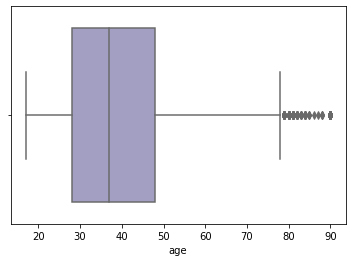

In [9]:
sns.boxplot('age', data=data, palette='Purples')

print('\n Maximum age in the data before removing the outliers', data.age.max())

print('\n99.5 quantile of the age : ', data.age.quantile(0.995))

data = data[data.age < data.age.quantile(0.995)]

print('\nMaximum age in the data after removing the outliers is: ', data.age.max())


We can see that for columns `age` any values after `78` seems to be an outlier and it is intuitive because it is very difficult to earn at this stage of the life. Removing these types of outliers can help us clean the data as well as in making good prediction. The maximum `age` in this data set is now `77`.

Maximun value in educaton num:  16
Minimun value in educaton num:  1


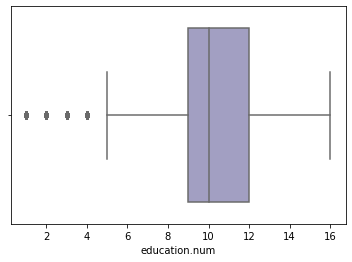

In [10]:
print('Maximun value in educaton num: ', data['education.num'].max())
print('Minimun value in educaton num: ', data['education.num'].min())
sns.boxplot('education.num', data=data, palette='Purples')

Here for the `education_num` column we can see that all those adults which have education lower than 5 is an outlier but that can't be the case everytime because there may be people with no education and may be they earn very well. So we won't remove these.

Maximum value of Hours Per Week column before handling the outliers:  99

Minimum value of Hours Per Week column before handling the outliers:  1


Maximum value of Hours Per Week column after handling the outliers:  59

Minimum value of Hours Per Week column after handling the outliers:  16


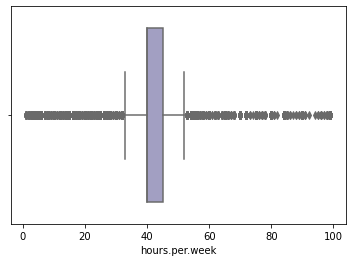

In [11]:
print('Maximum value of Hours Per Week column before handling the outliers: ' ,data['hours.per.week'].max())
print('\nMinimum value of Hours Per Week column before handling the outliers: ' ,data['hours.per.week'].min())

sns.boxplot(data['hours.per.week'], palette='Purples')

hpw_low = data['hours.per.week'].quantile(0.04)
hpw_high = data['hours.per.week'].quantile(0.93)

data = data[(data['hours.per.week'] > hpw_low) & (data['hours.per.week'] < hpw_high)]

print('\n\nMaximum value of Hours Per Week column after handling the outliers: ' ,data['hours.per.week'].max())
print('\nMinimum value of Hours Per Week column after handling the outliers: ' ,data['hours.per.week'].min())

For the `hours.per.week` column, we can see that more 90 percent of the data is treated as outlier and that can't be the case.It is common sense that nobody can work 100 hours per week and is also not common to work for hours betweeen 1 and 10 per week. So for this column we would take values from 15 to 60 hours per week.

As shown in the above cell, the max and the min values now for the `hours.per.week` are `59` and `16` respectively.

In [12]:
data.shape

(28463, 15)

Number of rows has been reduced now due to dropping values from the columns `age` and `hours_per_week` and now at this stage we are having `28463` rows and `15` columns.

In [13]:
correlation = data.corr()

correlation

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.075306,0.031150,0.081406,0.055908,0.117077
fnlwgt,-0.075306,1.000000,-0.048148,-0.005956,-0.010253,-0.014060
education.num,0.031150,-0.048148,1.000000,0.107801,0.074986,0.148723
capital.gain,0.081406,-0.005956,0.107801,1.000000,-0.030466,0.065904
capital.loss,0.055908,-0.010253,0.074986,-0.030466,1.000000,0.051870
hours.per.week,0.117077,-0.014060,0.148723,0.065904,0.051870,1.000000


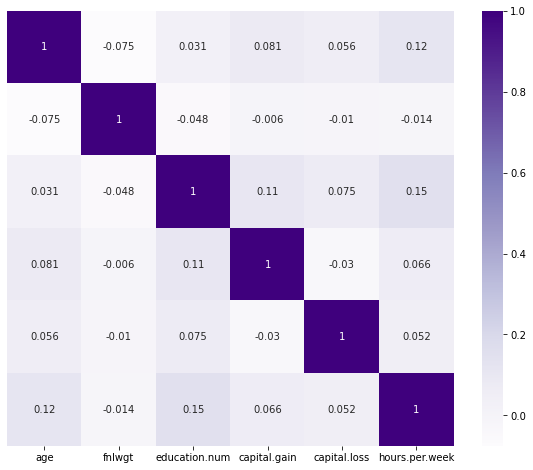

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, yticklabels=False, cmap='Purples')

This heatmap shows there is little to none correlation between attributes due to majority of the boxes are are showing correlation of around 0.5 which is normal. Since the correlation of `capital_gain`, `capital_loss`, and `fnlwgt` are negative with many of the other attributes, so it's better to drop them from the dataset.

In [15]:
data = data.drop('fnlwgt', axis=1)

data.shape

(28463, 14)

In [16]:
data.drop('education', axis=1, inplace=True)
data.columns

Index(['age', 'workclass', 'education.num', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'native.country', 'income'],
      dtype='object')

We have two different columns with same kind of information, `education.num` and `education`. `education` has the values of the education of the adults in string form while `education_num` have those values in integer form. So it is better to have only one of them and drop the other one because both are telling us the same information. We are going to drop `education` because the `education_num` is already in integer form so we won't need to convert it to numerical column as it is already there.

In [17]:
print('Number of individuals that are not from US: ',data[data['native.country']!='United-States'].shape[0])

print('\nNumber of individuals that are from US: ', data[data['native.country']== 'United-States'].shape[0])

Number of individuals that are not from US:  2489

Number of individuals that are from US:  25974


Out of `28463` individuals, `25974` of them are from `United-States` and only `2489` are from `40` other different countries. The sum of all the individuals that are not in `United-States` is `2489` which is very much of a low value as compared to `25974` which are from US. That is why we combined all those who aren't from US to compare it with those who are from US. If we didn't do this then after one hot encoding we will get so many columns from only one column, that is why it is better to combine all other countries and rename it as `Others`.

In [18]:
data['native.country'] = data['native.country'].replace(['Mexico', 'Greece', 'Vietnam', 'China',
       'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Japan', 'Hong', 'Taiwan', 'India', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'El-Salvador', 'Columbia', 'Guatemala', 'Cuba', 'Jamaica', 'Italy',
       'France', 'Yugoslavia', 'Scotland', 'Portugal', 'Ecuador', 'Laos',
       'Hungary', 'Honduras', 'Outlying-US(Guam-USVI-etc)', 'Thailand'], 'Others')

data['native.country'].value_counts()

United-States    25974
Others            2489
Name: native.country, dtype: int64

In [19]:
data.income   =   data.income.replace({'<=50K': 0, '>50K': 1})
data.sex  =   data.sex.replace({'Female': 0, 'Male': 1})

Replacing both the `income` and `sex` columns with `0s` and `1s`. For the `income` column `0` means `<=50K` and `1` means `>50K` while for the `sex` column `0` is for `female` and `1` is for `male` as both of these will be our final predicting variables for our classification tasks and it is necessary for both of them to be in numerical attribute.

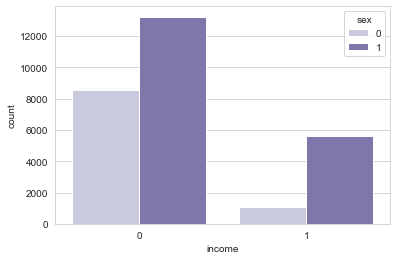

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='income',
    hue='sex',
    data=data,
    palette='Purples')

The above bar chart shows us the distinctions in male and female salary dependent on sexual orientation. We see includes are a lot higher in guys. In the >50k pay, guys indicated a much higher contrast between their female partners, proposing that guys rule that pay gap more so than those in the <=50 salary.

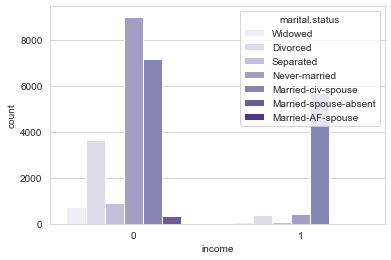

In [21]:
sns.countplot(x='income',
    hue='marital.status',
    data=data,
    palette='Purples')

The above bar chart outline speaks to salary of pay by conjugal status. Fascinating to see a couple of things, leading the <=50k salary of pay most elevated checks originate from the "Never-married" status. This recommends marriage does in reality accompany alot of monetary advantage, as should be obvious is important on the other portion of the outline. As married couples far outclass some other classification includes in the >50k salary of pay. We can affirm this again as the greater part of the divorced, separated , or widowed are situated in the lower pay gap. Recommending that, on the off chance that you need to make over 50k, you should get yourself an accomplice and keep them! For our next graph, Lets split up the age bunches in receptacles of 10 years, and see what sort of salary contrasts we see.

In [22]:
categorical_features = data.select_dtypes(include='object')
numerical_features = data.select_dtypes(exclude='object')

Splitting the `data` into `categorical_features` and `numerical_features`. The `categorical_features` of the data will be converted to dummy variables because all Machine Learning algorithms need numeric data for training as well as testing.

In [23]:
categorical_features.columns

Index(['workclass', 'marital.status', 'occupation', 'relationship', 'race',
       'native.country'],
      dtype='object')

In [24]:
numerical_features.columns

Index(['age', 'education.num', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income'],
      dtype='object')

In [25]:
one_hot_encoded = pd.get_dummies(categorical_features, prefix_sep=':', drop_first=True)
one_hot_encoded.head()

,workclass:Local-gov,workclass:Never-worked,workclass:Private,workclass:Self-emp-inc,workclass:Self-emp-not-inc,workclass:State-gov,workclass:Without-pay,marital.status:Married-AF-spouse,marital.status:Married-civ-spouse,marital.status:Married-spouse-absent,...,relationship:Not-in-family,relationship:Other-relative,relationship:Own-child,relationship:Unmarried,relationship:Wife,race:Asian-Pac-Islander,race:Black,race:Other,race:White,native.country:United-States
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1


Converting all the `categorical_features` into dummy variables and dropping the first dummy variable in order convert categorical variables into a form that could be provided to ML algorithms to do a better job in prediction.

In [26]:
#Here is the list of one-hot encoded attributes for clarification

one_hot_encoded.columns

Index(['workclass:Local-gov', 'workclass:Never-worked', 'workclass:Private',
       'workclass:Self-emp-inc', 'workclass:Self-emp-not-inc',
       'workclass:State-gov', 'workclass:Without-pay',
       'marital.status:Married-AF-spouse', 'marital.status:Married-civ-spouse',
       'marital.status:Married-spouse-absent', 'marital.status:Never-married',
       'marital.status:Separated', 'marital.status:Widowed',
       'occupation:Armed-Forces', 'occupation:Craft-repair',
       'occupation:Exec-managerial', 'occupation:Farming-fishing',
       'occupation:Handlers-cleaners', 'occupation:Machine-op-inspct',
       'occupation:Other-service', 'occupation:Priv-house-serv',
       'occupation:Prof-specialty', 'occupation:Protective-serv',
       'occupation:Sales', 'occupation:Tech-support',
       'occupation:Transport-moving', 'relationship:Not-in-family',
       'relationship:Other-relative', 'relationship:Own-child',
       'relationship:Unmarried', 'relationship:Wife',
       'race:As

In [27]:
income_data = pd.concat([numerical_features, one_hot_encoded], axis=1)
sex_data    = pd.concat([numerical_features, one_hot_encoded], axis=1)

income  =   income_data['income']
sex     =   sex_data['sex']


We are creating two different datasets, `income_data` and `sex_data`, in order to train the model on them for both the purposes (predicting the `income` and the `sex`). 

We are also making separate seriess of both the `income` and `sex` columns. These serieses (`income` and `sex`) will then be used as the Target Variables. For predicting the income of an individual, `income` series will be used as Target Variable for predicting the `income` and same for the other series i.e `sex` will be used as the Target Variable fro predicting the `sex` of an individual.

In [28]:
len(income_data.columns) == len(sex_data.columns)

True

### 1.2 Describe the final datasets

In [29]:
full_data_income = income_data
full_data_sex = sex_data

Concatinating `income` column with `income_data` and `sex` column with `sex_data` to make two final datasets, `full_data_income` and `full_data_sex`, for predicting the `income` and the `sex` of an individual respectively.

In [30]:
full_data_income.head(10)

,age,education.num,sex,capital.gain,capital.loss,hours.per.week,income,workclass:Local-gov,workclass:Never-worked,workclass:Private,...,relationship:Not-in-family,relationship:Other-relative,relationship:Own-child,relationship:Unmarried,relationship:Wife,race:Asian-Pac-Islander,race:Black,race:Other,race:White,native.country:United-States
2,66,10,0,0,4356,40,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
3,54,4,0,0,3900,40,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
4,41,10,0,0,3900,40,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1
5,34,9,0,0,3770,45,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
6,38,6,1,0,3770,40,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
7,74,16,0,0,3683,20,1,0,0,0,...,0,1,0,0,0,0,0,0,1,1
8,68,9,0,0,3683,40,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
10,45,16,0,0,3004,35,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
11,38,15,1,0,2824,45,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1
12,52,13,0,0,2824,20,1,0,0,1,...,1,0,0,0,0,0,0,0,1,1


In [31]:
full_data_sex.head(10)

,age,education.num,sex,capital.gain,capital.loss,hours.per.week,income,workclass:Local-gov,workclass:Never-worked,workclass:Private,...,relationship:Not-in-family,relationship:Other-relative,relationship:Own-child,relationship:Unmarried,relationship:Wife,race:Asian-Pac-Islander,race:Black,race:Other,race:White,native.country:United-States
2,66,10,0,0,4356,40,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
3,54,4,0,0,3900,40,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
4,41,10,0,0,3900,40,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1
5,34,9,0,0,3770,45,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
6,38,6,1,0,3770,40,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
7,74,16,0,0,3683,20,1,0,0,0,...,0,1,0,0,0,0,0,0,1,1
8,68,9,0,0,3683,40,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
10,45,16,0,0,3004,35,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
11,38,15,1,0,2824,45,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1
12,52,13,0,0,2824,20,1,0,0,1,...,1,0,0,0,0,0,0,0,1,1


### 2. Modeling and Evaluation

Splitting datasets into their respective training and testing label attributes for feeding it to the model.

In [32]:
income_data = full_data_income.drop(columns=['income'])
income_labels = full_data_income['income']

sex_data = full_data_sex.drop(columns=['sex'])
sex_labels = full_data_sex['sex']

We are dropping the `income` column from `full_data_income` and `sex` column from `full_data_sex` as these two are our Target Variables. The `income_data` will be having the `sex` column and `sex_data` will be having the `income` column because we don't want to lose the information. The other reason of keeping the `sex` column in `income_data` is that it can be an important feature for predicting the income of an individual and also `income` can be an important feature for predicting the `sex` of an individual.

The Classifiers we will be using are <br>
1. Support Vector Classifier
2. K-Nearest Neighbours
3. Random Forest Classifier

#### Why Support Vector Classifier?

The support vector machine is a classifier that speaks to the training information as points in space isolated into classifications by a hole as wide as could be expected under the circumstances. New points are then added to space by foreseeing which class they fall into and which space they will have a place with. 
It utilizes a subset of training data in the choice capacity which makes it memory proficient and is exceptionally powerful in high dimensional spaces. The main disadvantage with the support vector machine is that the algorithm doesn't straightforwardly give likelihood estimates.


#### Why K-Nearest Neighbours?

It is a lazy learning algorithm that stores all instances relating to training information in n-dimensional space. It is a languid learning calculation as it doesn't zero in on building an overall inner model, rather, it deals with putting away cases of training data. 
This algorithm is a very straightforward in its execution and is hearty to uproarious training information. Regardless of whether the training information is huge, it is very effective. The main inconvenience with the KNN calculation is that there is no compelling reason to decide the estimation of K and computation cost is pretty high contrasted with different other algorithms.


#### Why Random Forest Classifier?

Random decision trees or random forest are an ensemble learning method for classification, regression, etc. It operates by constructing a multitude of decision trees at training time and outputs the class that is the mode of the classes or classification or mean prediction(regression) of the individual trees.
The advantage of the random forest is that it is more accurate than the decision trees due to the reduction in the over-fitting. The only disadvantage with the random forest classifiers is that it is quite complex in implementation and gets pretty slow in real-time prediction.

Random decision trees or random forest are an ensemble learning strategy for classification, grouping, and so forth It works by developing a huge number of decision trees at training time and yields the class that is the method of the classes or classification or mean prediction(regression) of the individual trees. 
The benefit of the random forest is that it is more precise than the decision trees because of the decrease in the over-fitting. The main drawback with the random forest classifiers is that it is very perplexing in execution and gets pretty delayed in realtime prediction.

#### Evaluation Metrics

Evaluation Metrics we will be using are as follows: <br>
- Accuracy
- Precision
- Recall
- F-1 Score

#### Accuracy
As this is the classification task, so we want to check the accuracy of our model as how often it predicts accurately the given output label. Having high accuracy means our model is generally performing good. Accuracy is the total of `True Positives` + `True Negatives` and divided by `Total Number of input samples` <br>

#### Precision / Recall
Next we are checking the `precision` of our model. We want to see if it classifies based on the attributes, how often is it correct.
In `Recall` we want to see if it classifies accurately, how often does it classifies accurately.
In our task, we want high precision i.e to accurately predict the output label instead of high recall which even allows some false predictoins to fall in predictions test.
We can’t have it both ways, i.e high precision and recall a phenomenan known as `precision/recall tradeoff`. If we increase `precision`, `recall` would fall down. So for easy evaluation and balanced mean between both `precision and recall`, we use `F-1 Score`.

#### F-1 Score
It is often good to combine `Precision` and `Recall` into a single metric `F-1 Score`. As both `False Negatives` and `False Positives` play equall role in our classification tasks in terms of cost. So we want to evaluate based on F-1 score to see how Precission and Recall tradeoff plays in our classification task by telling us how precise our model is and tries to find the balance between precision and recall. So, by checking the `F-1 score` we can see how much better our model is performing.

Instantiating classifiers in the below cell.

In [33]:
clf_svc = SVC(degree = 5, tol = 0.0001)
clf_knn =  KNeighborsClassifier(n_neighbors = 8, leaf_size = 40)
clf_rforest = RandomForestClassifier(n_estimators = 350, max_depth = 10, min_samples_split = 4)

In [34]:
classifiers = ['Support Vector Classifier', 'K-Nearest Neighbours', 'Random Forest Classifier']

models = {clf_svc:'Support Vector Classifier',
          clf_knn:'K-Nearest Neighbours',
          clf_rforest: 'Random Forest Classifier'}

Creating a functions for easy confusion matrix plotting, training, and accuracy measures as we dont have to do the same steps for 3 times.

In [35]:
def plot_confusion_matrix(y_true, y_pred, 
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Purples):
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap = cmap)
    ax.figure.colorbar(im, ax=ax)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [36]:
def train(algo,name,X_train,y_train,X_test,y_test):
    algo.fit(X_train,y_train)
    y_pred = algo.predict(X_test)
    acc_sc = accuracy_score(y_test,y_pred)
    precision_sc = precision_score(y_test, y_pred)
    recall_sc = recall_score(y_test, y_pred)
    f1_sc = f1_score(y_test, y_pred)
    
    print(f"--------------------------------------------{name}---------------------------------------------------")
    print(f"Accuracy Score for {name}: {acc_sc*100:.4f}%")
    return y_test,y_pred,acc_sc, precision_sc, recall_sc, f1_sc


In [37]:
def acc_res(y_test,y_pred):
    
    print("Confusion Matrix")
    matrix = confusion_matrix(y_test,y_pred)
    print(matrix)
    print("---------------------------------------")
    TN = matrix[0,0]
    FP = matrix[0,1]
    FN = matrix[1,0]
    TP = matrix[1,1]
    accuracy_score=(TN+TP) / float(TP+TN+FP+FN)
    recall_score = (TP)/ float(TP+FN)
    precision_score = TP / float(TP+FP)
    print(f"Accuracy Score: {accuracy_score*100:.4f}%")
    print(f"Recall Score: {recall_score*100:.4f}%")
    print(f"Precision Score: {precision_score*100:.4f}%")
    print("-----------------------------------------")
    print("Classification Report")
    print(classification_report(y_test,y_pred))
    print(plot_confusion_matrix(y_test, y_pred))


### Task 1 - Predicting the Income (>50k/<=50k)

In [38]:
X_train_income, X_test_income, y_train_income, y_test_income = train_test_split(income_data, income_labels, test_size =0.2, random_state = 42, stratify = income_labels)

We have used `train_test_split` because our data is randomly placed and it doesn’t have a general data of varying ratio in attributes to use `stratifiedshufflesplit` instead, but we have added stratify parameter equals to the labels which is doing exactly the same thing as `stratifiedshufflesplit`

Now we are giong to Scale are data using `StandardScaler` for income task. <br>
We do this because variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. So, to deal with this potential problem feature-wise standardizedization is used before model fitting.
We have used `StandardScaler` instead of `MinMaxScaler` because `StandardScaler` uses the mean and standard deviation to calculate the scaled values meanwhile `MinMaxScaler` just rescales the variables in the range 0-1 which is not appropriate to use here as our data relies in number of variables.

We are only fitting our scaler object on Training data because we dont want to bias our model with the information from the testing data. If we fit our test data and transform it on it, we would calculate new mean and standard deviation for each feature which might causes problems while testing our model as both the scaled models are using different mean and standard deviations

So, our final data to be used is now `X_train_scaled_income`, `X_test_scaled_income`, `y_train_income`, and `y_test_income`

In [39]:
scaler_income = StandardScaler()

In [40]:
scaler_income.fit(X_train_income)
X_train_scaled_income = scaler_income.transform(X_train_income)
X_test_scaled_income = scaler_income.transform(X_test_income)

`Main_income` function for computing all the training and testing of the models with their evaluation metrics being displayes as well.

--------------------------------------------Support Vector Classifier---------------------------------------------------
Accuracy Score for Support Vector Classifier: 85.2275%
Confusion Matrix
[[4094  265]
 [ 576  758]]
---------------------------------------
Accuracy Score: 85.2275%
Recall Score: 56.8216%
Precision Score: 74.0958%
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4359
           1       0.74      0.57      0.64      1334

    accuracy                           0.85      5693
   macro avg       0.81      0.75      0.78      5693
weighted avg       0.84      0.85      0.85      5693

Normalized confusion matrix
[[0.93920624 0.06079376]
 [0.43178411 0.56821589]]
AxesSubplot(0.025,0.142852;0.76x0.771037)
--------------------------------------------K-Nearest Neighbours---------------------------------------------------
Accuracy Score for K-Nearest Neighbour

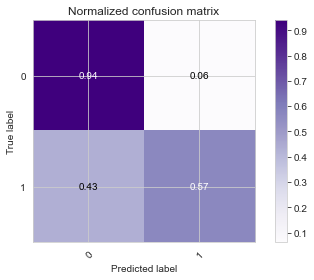

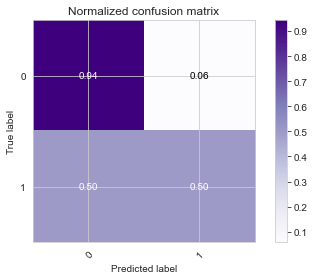

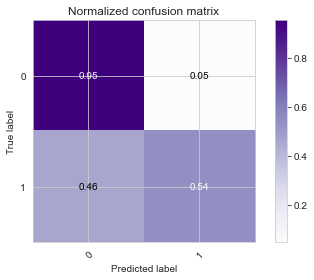

In [41]:
def main_income(models):
    accuracy_scores_income = []
    precision_scores_income = []
    recall_scores_income = []
    f1_scores_income = []
    for algo,name in models.items():
        y_test_train,y_pred,acc_sc, precision_sc, recall_sc, f1_sc = train(algo,name,X_train_scaled_income,y_train_income,X_test_scaled_income,y_test_income)
        acc_res(y_test_train,y_pred)
        accuracy_scores_income.append(acc_sc)
        precision_scores_income.append(precision_sc)
        recall_scores_income.append(recall_sc)
        f1_scores_income.append(f1_sc)
    return accuracy_scores_income, precision_scores_income, recall_scores_income, f1_scores_income
    
accuracy_scores_income, precision_scores_income, recall_scores_income, f1_scores_income = main_income(models)

In [42]:
pd.DataFrame(list(zip(accuracy_scores_income, precision_scores_income, recall_scores_income, f1_scores_income)) ,columns = ['Accuracy Scores', 'Precision', 'Recall', 'F1 Score'],index = classifiers).sort_values(by = 'Accuracy Scores',
                                                                                            ascending = False)

,Accuracy Scores,Precision,Recall,F1 Score
Random Forest Classifier,0.856315,0.778017,0.541229,0.638373
Support Vector Classifier,0.852275,0.740958,0.568216,0.643190
K-Nearest Neighbours,0.839101,0.728166,0.500000,0.592889


### Evaluation


`Accuracy` being our most important metric, we can see that Random Forest Classifier has scored more in terms of the accuracy. Meanwhile, we still have have to consider other metrics as well. By having a look at `F1_score`, we can say that `Support Vector Classifier` did a bit better job than `Random Forest Classifier`, however, It's precision is lot less than `Random Forest Classifier` and we can't ignore it. `K-Nearest Neighbours` on whole did a pretty hefty job compared with other classifiers. <br>

So, for further analysis in `Exceptional Work`, we'll use `Random Forest Classifier` as it is being the most adaptable classifier in our case

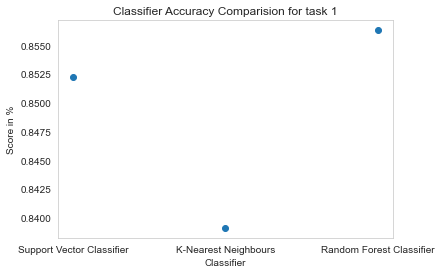

In [43]:
plt.scatter(classifiers, accuracy_scores_income)
plt.grid()
plt.title('Classifier Accuracy Comparision for task 1')
plt.xlabel('Classifier')
plt.ylabel('Score in %')
plt.show()

From above graph, we can see `Random Forest` scored more on `Accuracy` scale.

### Task 2: Predicting the Gender (Male/Female)

In [44]:
X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(sex_data, sex_labels, test_size =0.2, random_state = 42, stratify = sex_labels)



So after scaling, our final data to be used for task 2 will be `X_train_scaled_gender`, `X_test_scaled_gender`, `y_train_gender`, and `y_test_gender`

In [45]:
scaler_gender = StandardScaler()

In [46]:
scaler_gender.fit(X_train_gender)
X_train_scaled_gender = scaler_income.transform(X_train_gender)
X_test_scaled_gender = scaler_income.transform(X_test_gender)

`Main_gender` function for computing all the training and testing of the models with their evaluation metrics being displayes as well.

--------------------------------------------Support Vector Classifier---------------------------------------------------
Accuracy Score for Support Vector Classifier: 66.1690%
Confusion Matrix
[[   0 1926]
 [   0 3767]]
---------------------------------------
Accuracy Score: 66.1690%
Recall Score: 100.0000%
Precision Score: 66.1690%
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1926
           1       0.66      1.00      0.80      3767

    accuracy                           0.66      5693
   macro avg       0.33      0.50      0.40      5693
weighted avg       0.44      0.66      0.53      5693

Normalized confusion matrix
[[0. 1.]
 [0. 1.]]
AxesSubplot(0.025,0.142852;0.76x0.771037)
--------------------------------------------K-Nearest Neighbours---------------------------------------------------
Accuracy Score for K-Nearest Neighbours: 82.3643%
Confusion Matrix
[[

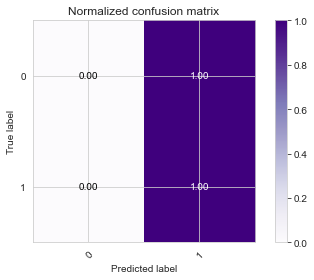

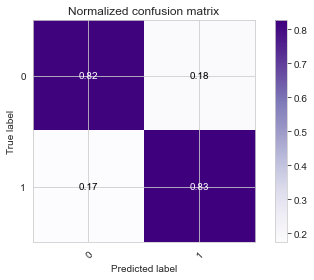

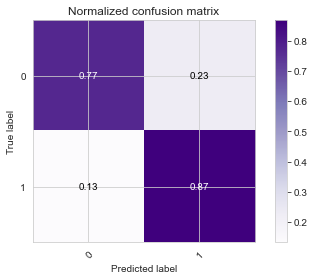

In [47]:
def main_gender(models):
    accuracy_scores_gender = []
    precision_scores_gender = []
    recall_scores_gender = []
    f1_scores_gender = []
    for algo,name in models.items():
        y_test_train,y_pred,acc_sc, precision_sc, recall_sc, f1_sc = train(algo,name,X_train_scaled_gender,y_train_gender,X_test_scaled_gender,y_test_gender)
        acc_res(y_test_train,y_pred)
        accuracy_scores_gender.append(acc_sc)
        precision_scores_gender.append(precision_sc)
        recall_scores_gender.append(recall_sc)
        f1_scores_gender.append(f1_sc)
    return accuracy_scores_gender, precision_scores_gender, recall_scores_gender, f1_scores_gender
    
accuracy_scores_gender, precision_scores_gender, recall_scores_gender, f1_scores_gender = main_gender(models)

In [48]:
pd.DataFrame(list(zip(accuracy_scores_gender, precision_scores_gender, recall_scores_gender, f1_scores_gender)) ,columns = ['Accuracy Scores', 'Precision', 'Recall', 'F1 Score'],index = classifiers).sort_values(by = 'Accuracy Scores',
                                                                                            ascending = False)

,Accuracy Scores,Precision,Recall,F1 Score
Random Forest Classifier,0.835236,0.881781,0.867268,0.874465
K-Nearest Neighbours,0.823643,0.898701,0.826653,0.861173
Support Vector Classifier,0.661690,0.661690,1.000000,0.796406


### Evaluation


`Accuracy` being our most important metric, we can see that Random Forest Classifier again has scored more in terms of the accuracy. Meanwhile, we still have have to consider other metrics as well. `Support Vector Classifier` this time did a pretty bad job in terms of all metrics. It does did a good on recignizing `false-negatives` as the percent is zero but in terms of classifying `True Negatives` it did not perform well. By having a look at `F1_score`, we can say that `Random Forest Classifier` did a bit a slightly better job than `K-Nearest Neighbor Classifier`, however, It's precision is better than `Random Forest Classifier` and we can't ignore it. `K-Nearest Neighbours` on whole did a pretty hefty job compared with other classifiers. <br>

So, for further analysis in `Exceptional Work`, we'll use `Random Forest Classifier` as it is being the most adaptable classifier in our case

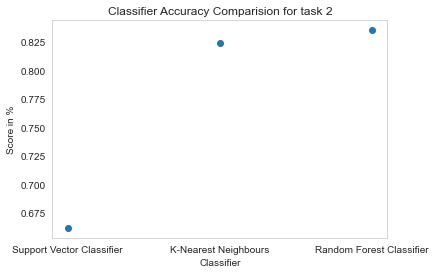

In [49]:
plt.scatter(classifiers, accuracy_scores_gender)
plt.grid()
plt.title('Classifier Accuracy Comparision for task 2')
plt.xlabel('Classifier')
plt.ylabel('Score in %')
plt.show()

#### Feature Importance

In [50]:
column_names = []
for col_name in income_data.columns: 
    column_names.append(col_name)

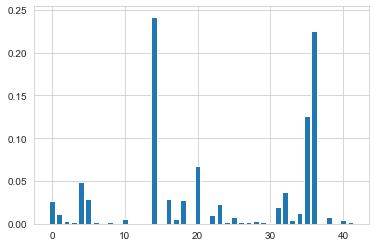

In [51]:
importance = clf_rforest.feature_importances_

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [52]:
feature_imp = pd.Series(importance,index=column_names).sort_values(ascending=False)
top_feat = feature_imp.nlargest(n=5)
top_feat

marital.status:Married-civ-spouse    0.241859
relationship:Wife                    0.225708
relationship:Unmarried               0.126054
occupation:Craft-repair              0.067106
capital.loss                         0.048262
dtype: float64

Calculating the feature importance of attributes, our analysis found
that these were the top attributes contributing to the model.  Earlier in our
analysis, We noticed the discrepency of married couple's having a better
 financial advantage over unmarried, so we're glad to see that attribute on top
 as it validates that hypothesis.  Relationship having a wife is no surprise as those couples
 who are working tend to make more money.



 | Attribute             | Feature Importance |
 |-----------------------|--------------------|
 | marital.status:Married-civ-spouse | 0.241859           |
 | relationship:Wife          | 0.225708           |
 | relationship:Unmarried         | 0.126054           |
 | occupation:Craft-repair                   | 0.067106           |
 | capital.loss        | 0.048262           |
 

### Deployment

For income classification task, we forsee a large number of opportunities for application. Regardless of whether it be for banks/Visa organizations to improve their own models for how safe they feel loaning a specific gathering of individuals cash dependent on their monetary conditions. It could likewise be applied for public review's that individuals need to lead. Our model could help trim down what factors they need to remember for their refreshed model. ie - which are the most huge factors and focus on those for examination. Another application could be for neighborhood governments, to help plan new projects that could advance and benefit the particular set of individuals. <br>

For sex classification task, one zone where this model may demonstrate valuable is in gathering client data from sites. Given numerous sites have absolute portrayals of their client information, if somebody was state, in the medical care area and was endeavoring to study the overall population on cardiovascular illness. A few people may not feel slanted to report their sexual orientation, yet that data could demonstrate helpful to the analyst so as to group the individual appropriately. Utilizing our arrangement technique's, we could retrofit the model over their review information and start to do expectation on that. <br>

Estimating the models worth would be done through a steady observing of the calculations Accuracy and F1-score as we've done in this extend. Enabling the end client to monitor how well the model is anticipating, as we add more information to it. Arrangement of the model, could be through a rest API administration, an inner capacity worked in the backend of whatever Database framework they have set up. As far as other information that could be helpful to Census Data, we would propose finding an asset that can give, lodging possession, nearby financial key execution factors, postal districts to decide ability pools for who lives in what territory. The prospects are enormous relying upon what components impact the clients business most. As every business you would sell this model also would almost certainly have their own thought's behind what elements make them sucssesful

### Exceptional Work

Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define.


We can now perform grid search building on the result from the random search. We will test a range of hyperparameters around the best values returned by random search.

This will try out 1 * 4 * 2 * 3 * 3 * 4 = 288 combinations of settings. We can fit the model, display the best hyperparameters, and evaluate performance:

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [20, 40, 80, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [150, 300, 550, 1000]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [54]:
grid_search.fit(X_train_scaled_income, y_train_income);

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 11.3min finished


In [55]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 150}

In [56]:
rfc1=RandomForestClassifier(max_features = 3, n_estimators= 150, max_depth=80, bootstrap = 'True', min_samples_leaf = 3, min_samples_split = 8)

In [57]:
rfc1.fit(X_train_scaled_income, y_train_income)

RandomForestClassifier(bootstrap='True', ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
pred=rfc1.predict(X_test_scaled_income)

In [59]:
print("Accuracy for Random Forest: ",accuracy_score(y_test_income,pred))

Accuracy for Random Forest:  0.8621113648340066


A slight increase in performance indicates we have reached the maximum returns for hyperparameter tuning. We could continue, but the returns would be minimal at best.